In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [2]:
data=pd.read_csv("C:\\Users\\iPC\\New folder\\Assignments\\stockdata.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1994 non-null   object 
 1   Citi_Open        1994 non-null   float64
 2   HSBC_Open        1994 non-null   float64
 3   BOA_Open         1994 non-null   float64
 4   Benchmark_Index  1994 non-null   float64
 5   Volume           1994 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 93.6+ KB


In [4]:
data.columns

Index(['Date', 'Citi_Open', 'HSBC_Open', 'BOA_Open', 'Benchmark_Index',
       'Volume'],
      dtype='object')

In [5]:
data.isnull().sum()

Date               0
Citi_Open          0
HSBC_Open          0
BOA_Open           0
Benchmark_Index    0
Volume             0
dtype: int64

In [6]:
data.head()

,Date,Citi_Open,HSBC_Open,BOA_Open,Benchmark_Index,Volume
0,10-12-2009,25.476,28.931,24.064,27.356,18257213
1,11-12-2009,27.298,28.308,27.177,27.968,7963846
2,14-12-2009,27.949,28.308,26.525,26.894,4921468
3,15-12-2009,26.440,26.704,24.638,24.723,6572225
4,16-12-2009,24.788,25.043,23.431,24.732,12636765


In [7]:
data.describe().round(2)

,Citi_Open,HSBC_Open,BOA_Open,Benchmark_Index,Volume
count,1994.00,1994.00,1994.00,1994.00,1994.00
mean,39.72,40.13,39.31,39.73,1804325.34
std,5.56,5.51,5.62,5.55,1408227.82
min,24.36,24.94,23.43,24.57,251126.00
25%,35.35,35.75,34.86,35.31,1027536.75
50%,40.33,40.74,39.95,40.37,1423233.50
75%,44.51,44.93,44.13,44.57,2036217.50
max,49.86,50.12,49.34,49.83,18257213.00


In [8]:
#Mean=39.72	
#range of std deviation=
#24.36-49.86
(49.86-24.36)/(6*5.56)

0.7643884892086331

In [9]:
df1=data.sort_values(['Date'],ascending=False)

In [10]:
missing_value_count=data.isnull().sum()
missing_value_count


Date               0
Citi_Open          0
HSBC_Open          0
BOA_Open           0
Benchmark_Index    0
Volume             0
dtype: int64

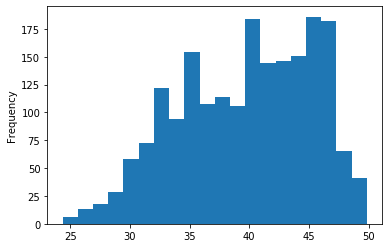

In [11]:
data['Citi_Open'].plot(kind="hist",bins=20)

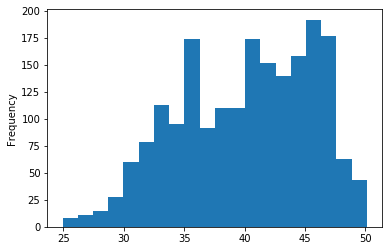

In [12]:
data['HSBC_Open'].plot(kind='hist',bins=20)

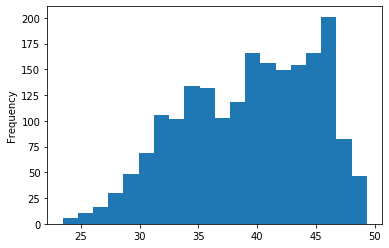

In [13]:
data['BOA_Open'].plot(kind='hist',bins=20)

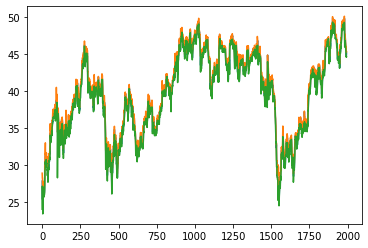

In [14]:
data['Citi_Open'].plot(kind='line')
data['HSBC_Open'].plot(kind='line')
data['BOA_Open'].plot(kind='line')

In [15]:
import seaborn as sns

In [16]:
data1=data[['Citi_Open','HSBC_Open','BOA_Open']]
data1.head()

,Citi_Open,HSBC_Open,BOA_Open
0,25.476,28.931,24.064
1,27.298,28.308,27.177
2,27.949,28.308,26.525
3,26.440,26.704,24.638
4,24.788,25.043,23.431


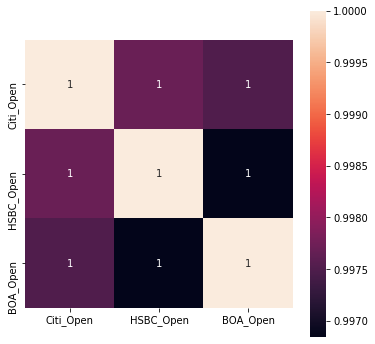

In [17]:
corr_matrix = data1.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix,square=True,annot=True)
plt.show()

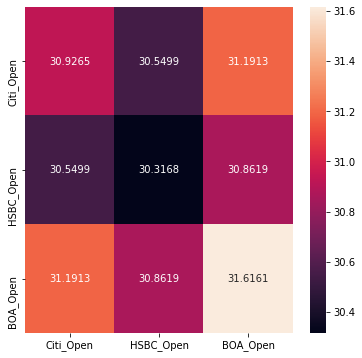

In [18]:
covMatrix = pd.DataFrame.cov(data1)
plt.subplots(figsize=(6,6))
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [21]:
from scipy import stats
df1['z_C']=stats.zscore(df1['Citi_Open'])
df1['z_h']=stats.zscore(df1['HSBC_Open'])
df1['z_b']=stats.zscore(df1['BOA_Open'])

In [22]:
df1.head()

,Date,Citi_Open,HSBC_Open,BOA_Open,Benchmark_Index,Volume,z_C,z_h,z_b
1523,31-12-2015,38.525,38.912,38.436,38.446,733818,-0.215633,-0.221329,-0.156029
1271,31-12-2014,46.415,46.628,45.673,45.709,752429,1.203492,1.180385,1.131370
1019,31-12-2013,49.028,49.434,48.902,49.292,703661,1.673476,1.690132,1.705780
767,31-12-2012,35.856,36.472,35.537,36.462,1269977,-0.695689,-0.664588,-0.671736
266,31-12-2010,43.793,44.447,43.716,44.447,469318,0.731889,0.784177,0.783237


In [23]:
threshold = 3
print(np.where(df1['z_C'] > 3))
print(np.where(df1['z_h'] > 3))
print(np.where(df1['z_b'] > 3))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [24]:
Q1 = df1['z_C'].quantile(0.25)
Q3 = df1['z_C'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.6471468103459583


In [25]:
c=(df1['z_C'] < (Q1 - 1.5 * IQR)) |(df1['z_C'] > (Q3 + 1.5 * IQR))
false = (c == 0).sum()
true=(c==1).sum()
print(false)
print(true)

1994
0


In [26]:
Q1 = df1['z_h'].quantile(0.25)
Q3 = df1['z_h'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.6676237552527495


In [27]:
c=(df1['z_h'] < (Q1 - 1.5 * IQR)) |(df1['z_h'] > (Q3 + 1.5 * IQR))
false = (c == 0).sum()
true=(c==1).sum()
print(false)
print(true)

1994
0


In [28]:
Q1 = df1['z_b'].quantile(0.25)
Q3 = df1['z_b'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.6493628732683696


In [29]:
c=(df1['z_b'] < (Q1 - 1.5 * IQR)) |(df1['z_b'] > (Q3 + 1.5 * IQR))
false = (c == 0).sum()
true=(c==1).sum()
print(false)
print(true)

1994
0


In [30]:
#create our portfolio of equities 
tickers = ['Citi','HSBC', 'BOA']
#set the weights
weights = np.array([.25,.6,.15])
#set an initial investment level
initial_investment= 100000
df2 = df1[['Citi_Open', 'HSBC_Open', 'BOA_Open']]
returns = df2.pct_change()
returns.tail()

,Citi_Open,HSBC_Open,BOA_Open
1543,-0.305922,-0.274726,-0.301336
789,0.412637,0.354488,0.430338
538,-0.089210,-0.089782,-0.089585
287,0.235476,0.234057,0.238053
34,-0.329734,-0.332787,-0.365960


In [31]:
#create our portfolio of equities 
tickers = ['Citi','HSBC', 'BOA']
#set the weights
weights1 = np.array([.25,.6,.15])
weights2 = np.array([.5,.25,.25])
weights3=np.array([.75,.125,.125])

#set an initial investment level
initial_investment= 1000000
df2 = data[['Citi_Open', 'HSBC_Open', 'BOA_Open']]
returns = df2.pct_change()
returns.tail()

,Citi_Open,HSBC_Open,BOA_Open
1989,-0.008250,0.001065,-0.002633
1990,0.003929,-0.001064,-0.017752
1991,-0.020246,-0.013221,-0.000896
1992,-0.000491,-0.003085,0.002869
1993,0.008038,0.002431,-0.001565


In [32]:
weights=np.vstack((weights1,weights2,weights3))
weights

array([[0.25 , 0.6  , 0.15 ],
       [0.5  , 0.25 , 0.25 ],
       [0.75 , 0.125, 0.125]])

In [33]:
#Create a covariance matrix based on returns
cov_matrix=returns.cov()
cov_matrix

,Citi_Open,HSBC_Open,BOA_Open
Citi_Open,0.000279,0.000176,0.000203
HSBC_Open,0.000176,0.000256,0.000188
BOA_Open,0.000203,0.000188,0.000315


In [55]:
#Calculate mean returns for each stock
avg_rets=returns.mean()

#Calculate mean returns for portfolio is overall
#Using dot product to normalize individual means against investment weights
#normalize the individual means against investment weights
port_mean1=[]
port_stdev1=[]
mean_investment1=[]
stdev_investment1=[]
n=len(weights)
for i in range(0,n):
    port_mean=avg_rets.dot(weights[i])
    port_mean1.append(port_mean)

#Calculate portfolio Standard Deviation
    port_stdev=np.sqrt(weights[i].T.dot(cov_matrix).dot(weights[i]))
    port_stdev1.append(port_stdev)

#Calculate mean of investment
    mean_investment=(1+port_mean)*initial_investment
    mean_investment1.append(mean_investment)
#Calculate Standard deviation of investment
    stdev_investment=initial_investment*port_stdev
    stdev_investment1.append(stdev_investment)


In [57]:
stdev_investment1

[14780.474250744648, 14960.059758297426, 15590.674996556705]

In [60]:
conf_level=0.05
import scipy
from scipy.stats import norm
#cutoff1= norm.ppf(conf_level,mean_investment,stdev_investment)

In [61]:
cutoff1=[]
var_1d1=[]

In [62]:
#estimate the value at Risk(var) for the portfolio
#by subtracting the inital investment from the calculation above

#Finally,we can calculate the VAR at our Confidenct interval
cutoff1= norm.ppf(conf_level,mean_investment1,stdev_investment1)
var_1d1= initial_investment- cutoff1

In [63]:
var_1d1

array([23923.55700531, 24188.70375423, 25221.96456923])

In [65]:
var_1d1/initial_investment

array([0.02392356, 0.0241887 , 0.02522196])

In [66]:
#Propsal One is best 
#propsal1= 2.39
#Propsal2= 2.41
#Propsal3= 2.52